In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency
from scipy import stats

In [3]:
PATH = r'C:\FundamentoPython\cadernos\portfolio\hr_analytics\data\HR-Employee-Attrition.csv'
df_raw = pd.read_csv(PATH)

In [4]:
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
display(df_raw.shape)
print('*' * 50)
display(df_raw.dtypes)

(1470, 35)

**************************************************


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df_raw.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df_raw.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Entendimento Inicial dos Dados

Na análise inicial da estrutura do dataset, não foram identificados valores
nulos nem tipos de dados inválidos. As variáveis numéricas e categóricas
estão coerentes com o contexto de recursos humanos.

Entretanto, observou-se que algumas variáveis categóricas e binárias
(`Attrition`, `OverTime`, `Gender`, `Department`, entre outras) estão
representadas como `object` ou `int`, podendo ser ajustadas em etapa
posterior para facilitar análises comparativas.

A análise estatística descritiva indica alta variabilidade em variáveis
como `DailyRate`, `HourlyRate` e `MonthlyIncome`, o que reflete diferenças
de cargos, níveis e contratos, não caracterizando necessariamente a
presença de valores anômalos.

Também foram identificadas variáveis constantes (`EmployeeCount`,
`StandardHours` e `Over18`), que não agregam poder analítico e poderão ser
desconsideradas nas análises subsequentes.

----

In [8]:
# Cópia
df_clean = df_raw.copy()

# Remover colunas
colums = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df_clean = df_clean.drop(columns=colums)

In [9]:
binarias = ['Attrition', 'OverTime']
df_clean[binarias] = df_clean[binarias].astype('category')

In [10]:
categoricas = [
    'Gender', 'Department', 'JobRole', 'MaritalStatus',
    'EducationField', 'BusinessTravel'
]
df_clean[categoricas] = df_clean[categoricas].astype('category')

In [11]:
ordinais = [
    'Education', 'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
    'PerformanceRating'
]
df_clean[ordinais] = df_clean[ordinais].astype('category')

In [12]:
display(df_clean.shape)
display(df_clean.dtypes)

(1470, 31)

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                       int64
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance             category
Y

-------------

# _Perfil Demográfico (Quem sai mais?)_

In [13]:
# Criando faixa etárias
bins = [18, 25, 35, 45, 60]
labels = ['18-24', '25-34', '35-44', '45+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Calculando a porcentagem de desligamento por faixa etária
taxa_por_idade = df_clean.groupby('Age_Group')['Attrition'].value_counts(normalize=True).unstack() * 100
formatado = pd.DataFrame((taxa_por_idade['Yes'].sort_values(ascending=False)).round(2))

print("Taxa de Saída (% por Faixa Etária:")
display(formatado)

Taxa de Saída (% por Faixa Etária:


C:\Users\luizt\AppData\Local\Temp\ipykernel_14376\3919742291.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_por_idade = df_clean.groupby('Age_Group')['Attrition'].value_counts(normalize=True).unstack() * 100


,Yes
Age_Group,
18-24,39.18
25-34,20.22
45+,11.65
35-44,10.10


In [14]:
idade_saiu = df_clean[df_clean['Attrition'] == 'Yes']['Age']
idade_ficou = df_clean[df_clean['Attrition'] == 'No']['Age']

t_stat, p_valor = stats.ttest_ind(idade_saiu, idade_ficou)
print('Se for < 0.05, a idade realmente influencia a saída.\n')
print(f'P-valor: {p_valor:.4f}')

Se for < 0.05, a idade realmente influencia a saída.

P-valor: 0.0000


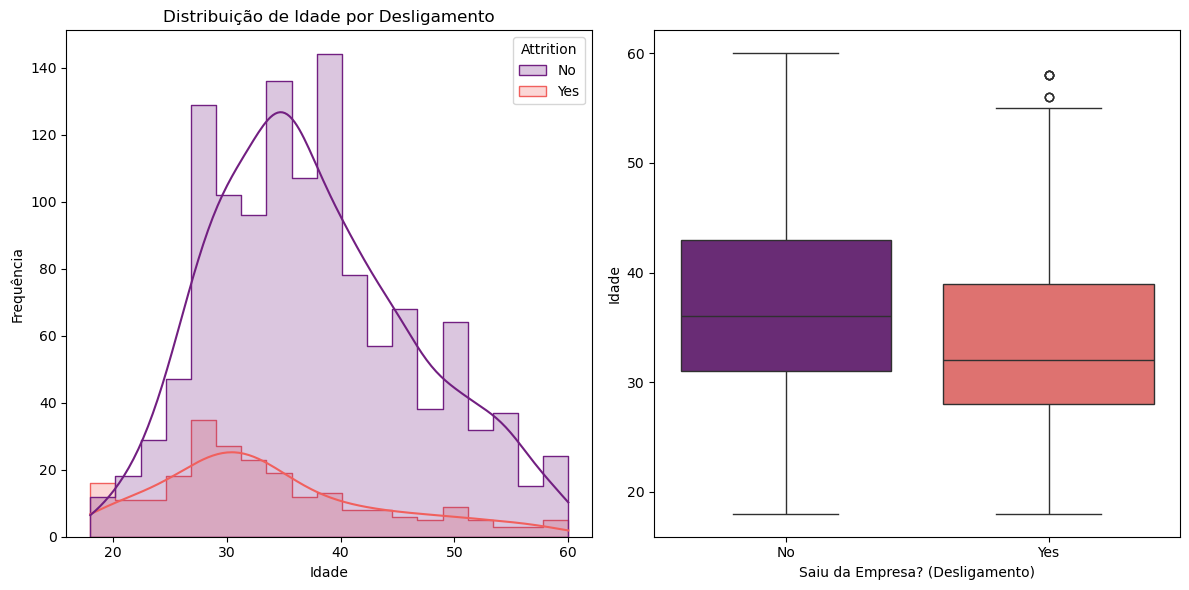

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='Age', hue='Attrition', kde=True, element='step', palette='magma')
plt.title('Distribuição de Idade por Desligamento')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Attrition', y='Age', palette='magma', hue='Attrition', legend=False)
plt.xlabel('Saiu da Empresa? (Desligamento)')
plt.ylabel('Idade')

plt.tight_layout()
plt.savefig('faixaetaria.png')
plt.show()

In [16]:
# Existe diferença de attrition por gênero? 
# Cria uma tabela cruzada
genero_attrition = pd.crosstab(df_clean['Gender'], df_clean['Attrition'], normalize='index') * 100
genero_attrition_formatado = pd.DataFrame(genero_attrition)

print('Porcentagem de Attrition por Gênero:')
display(genero_attrition_formatado.round(2))

Porcentagem de Attrition por Gênero:


Attrition,No,Yes
Gender,,
Female,85.20,14.80
Male,82.99,17.01


- Para variáveis categóricas (Gênero vs Attrition), não usamos o Teste T, usamos o Teste Qui-Quadrado (Chi-Square). Ele nos dirá se a diferença entre os gêneros é significativa.
- Se esse P-valor for maior que 0.05, significa que o gênero não influencia a saída

In [17]:
# Criar tabela contigência (sem %)
tabela = pd.crosstab(df_clean['Gender'], df_clean['Attrition'])

# Executar teste
chi2, p, dof, ex = chi2_contingency(tabela)

print(f'P-valor do Teste Qui-Quadrado: {p:.4f}')
if p < 0.05:
    print("Conclusão: O gênero tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que gênero influencie o desligamento.")


P-valor do Teste Qui-Quadrado: 0.2906
Conclusão: Não há evidência estatística de que gênero influencie o desligamento.


In [26]:
tabela

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [30]:
tabela_groupby = df_clean.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
tabela_groupby

C:\Users\luizt\AppData\Local\Temp\ipykernel_14376\716418582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_groupby = df_clean.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)


Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


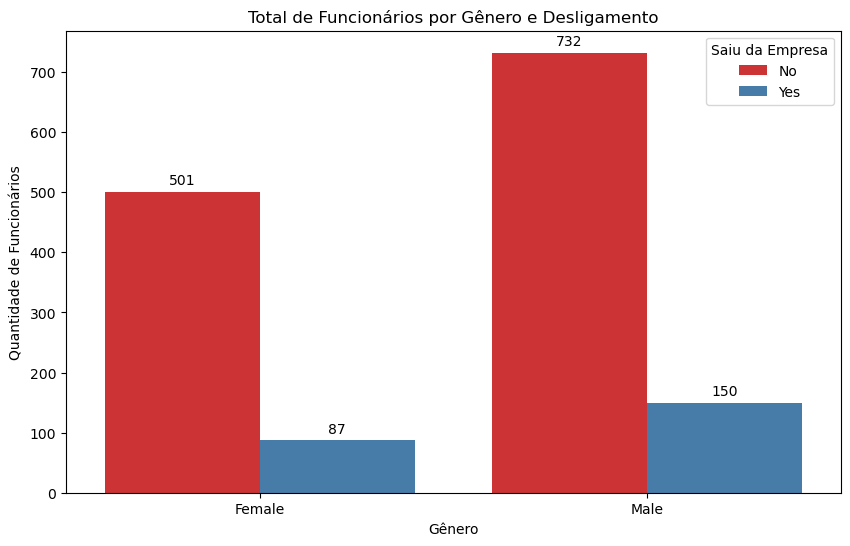

In [25]:
plt.figure(figsize=(10,6))

# Gráfico de contagem total por gênero e quem saiu
ax = sns.countplot(data=df_clean, x='Gender', hue='Attrition', palette='Set1')

plt.title('Total de Funcionários por Gênero e Desligamento')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Funcionários')
plt.legend(title="Saiu da Empresa")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.show()


In [ ]:
estado_civil_attrition = pd.crosstab(df_clean['MaritalStatus'], df_clean['Attrition'], normalize='index') * 100
estado_civil_attrition_df = pd.DataFrame(estado_civil_attrition.round(2))

print('Taxa de Rotatividade por Estado Civil')
display(estado_civil_attrition_df)


Taxa de Rotatividade por Estado Civil


Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


In [ ]:
# Criar tabela contigência (sem %)
tabela_civil = pd.crosstab(df_clean['Gender'], df_clean['Attrition'])

# Executar teste
chi2, p, dof, ex = chi2_contingency(tabela_civil)

print(f'P-valor do Teste Qui-Quadrado: {p:.4f}')
if p < 0.05:
    print("Conclusão: Estado Civil tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que Estado Civil influencie o desligamento.")

P-valor do Teste Qui-Quadrado: 0.2906
Conclusão: Não há evidência estatística de que Estado Civil influencie o desligamento.


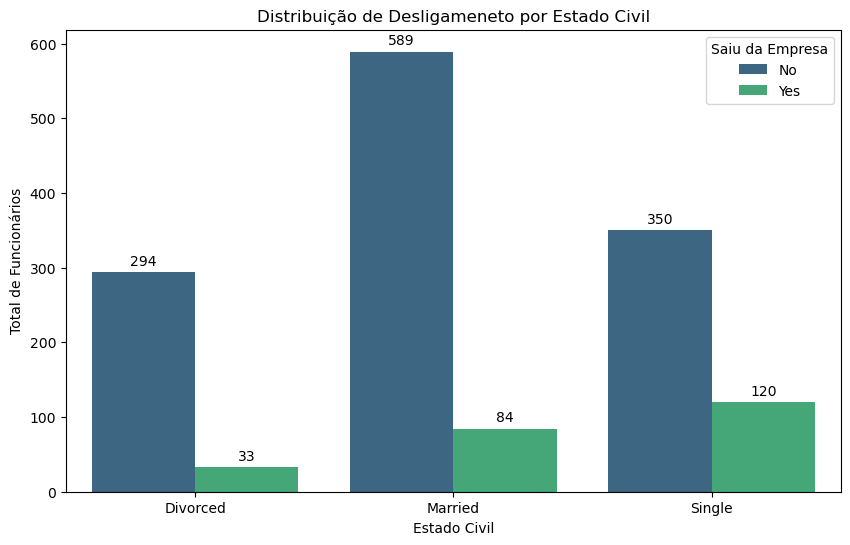

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='MaritalStatus', hue='Attrition', palette='viridis')

plt.title('Distribuição de Desligameneto por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Total de Funcionários')
plt.legend(title='Saiu da Empresa')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

plt.show()

In [ ]:
taxa_campo = pd.crosstab(df_clean['EducationField'], df_clean['Attrition'], normalize='index') * 100
taxa_campo = taxa_campo['Yes'].sort_values(ascending=False)
taxa_campo_df = pd.DataFrame(taxa_campo.round(2))

print('Taxa de Desligamento por Area de Formação')
display(taxa_campo_df)

Taxa de Desligamento por Area de Formação


,Yes
EducationField,
Human Resources,25.93
Technical Degree,24.24
Marketing,22.01
Life Sciences,14.69
Medical,13.58
Other,13.41


In [ ]:
# Criar a tabela de contingência
tabela_edu = pd.crosstab(df_clean['EducationField'], df_clean['Attrition'])

# Executar o teste
chi2, p, dof, ex = chi2_contingency(tabela_edu)

print(f"P-valor: {p:.4f}")

if p < 0.05:
    print("Conclusão: A Área de Formação tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que a Área de Formação influencie o desligamento.")

P-valor: 0.0068
Conclusão: A Área de Formação tem influência significativa no desligamento.


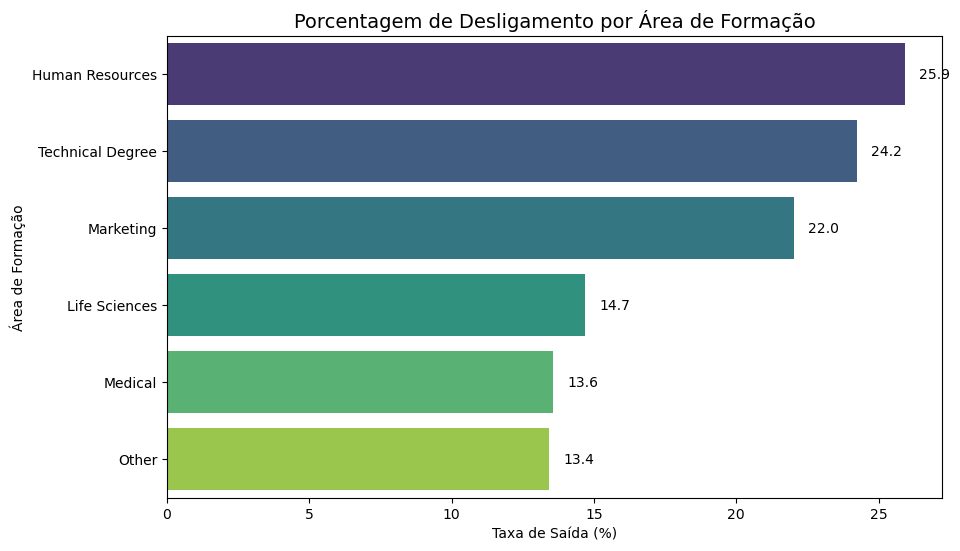

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=taxa_campo.values, y=taxa_campo.index, palette='viridis', hue=taxa_campo.index, legend=False)

plt.title('Porcentagem de Desligamento por Área de Formação', fontsize=14)
plt.xlabel('Taxa de Saída (%)')
plt.ylabel('Área de Formação')

# Adicionando o valor 
for i, v in enumerate(taxa_campo.values):
    plt.text(v + 0.5, i, f'{v:.1f}', va='center')

plt.show()

## Análise do Perfil Demográfico e Formação

A análise do perfil demográfico indica que a taxa de desligamento é
significativamente maior entre funcionários mais jovens, especialmente
na faixa etária de 18 a 24 anos, sugerindo maior rotatividade nos estágios
iniciais da carreira.

Em relação ao gênero, apesar de pequenas diferenças percentuais nas taxas
de desligamento entre homens e mulheres, o teste estatístico do Qui-quadrado
não encontrou evidência significativa de associação entre gênero e attrition.

Quanto ao estado civil, observou-se que funcionários solteiros apresentam
taxas de desligamento consideravelmente mais altas quando comparados a
casados e divorciados. No entanto, essa diferença requer validação
estatística adicional para confirmar sua significância.

Por fim, a análise da área de formação revelou associação estatisticamente
significativa com o desligamento, destacando maiores taxas entre funcionários
das áreas de Recursos Humanos, Technical Degree e Marketing.

--------------

# _Perfil Profissional/Cargo_

In [ ]:

# Agrupando número de desligamentos por departamento
dept_attrition_count = df_clean[df_clean['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count()
pd.DataFrame(dept_attrition_count)

,Attrition
Department,
Human Resources,12
Research & Development,133
Sales,92


In [ ]:
# Criando a tabela de porcentagem por departamento
dept_attrition = pd.crosstab(df_clean['Department'], df_clean['Attrition'], normalize='index') * 100
dept_attrition = dept_attrition['Yes'].sort_values(ascending=False)

pd.DataFrame(dept_attrition.round(2))

,Yes
Department,
Sales,20.63
Human Resources,19.05
Research & Development,13.84


In [ ]:
tabela_dept = pd.crosstab(df_clean['Department'], df_clean['Attrition'])
chi2, p, dof, ex = chi2_contingency(tabela_dept)

print(f"P-valor: {p:.4f}")
if p < 0.05:
    print("Conclusão: O departamento tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que o departamento influencie o desligamento.")

P-valor: 0.0045
Conclusão: O departamento tem influência significativa no desligamento.


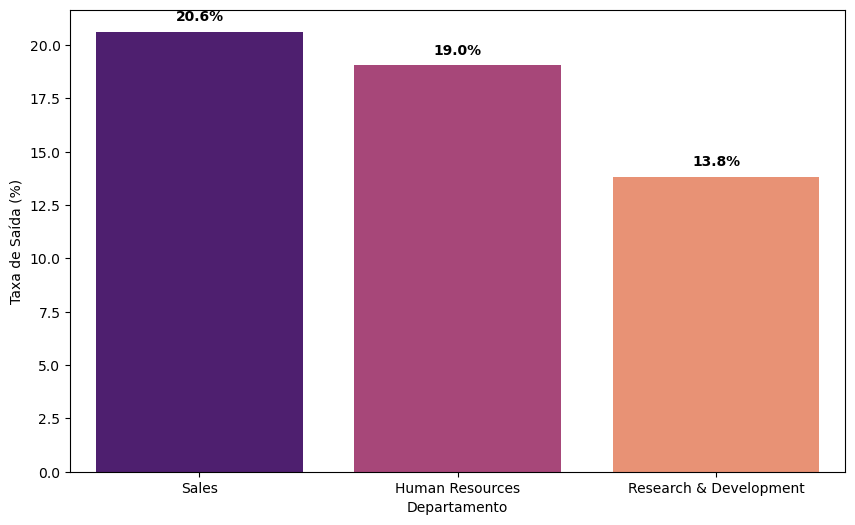

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='magma', hue=dept_attrition.index, legend=False)
plt.ylabel('Taxa de Saída (%)')
plt.xlabel('Departamento')

# Adicionando valores
for i, v in enumerate(dept_attrition.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

In [ ]:
# Tabela de porcentagem de saída por cargo
cargo_attrition = pd.crosstab(df_clean['JobRole'], df_clean['Attrition'], normalize='index') * 100
cargo_attrition = cargo_attrition['Yes'].sort_values(ascending=False)

pd.DataFrame(cargo_attrition.round(2))

,Yes
JobRole,
Sales Representative,39.76
Laboratory Technician,23.94
Human Resources,23.08
Sales Executive,17.48
Research Scientist,16.10
Manufacturing Director,6.90
Healthcare Representative,6.87
Manager,4.90
Research Director,2.50


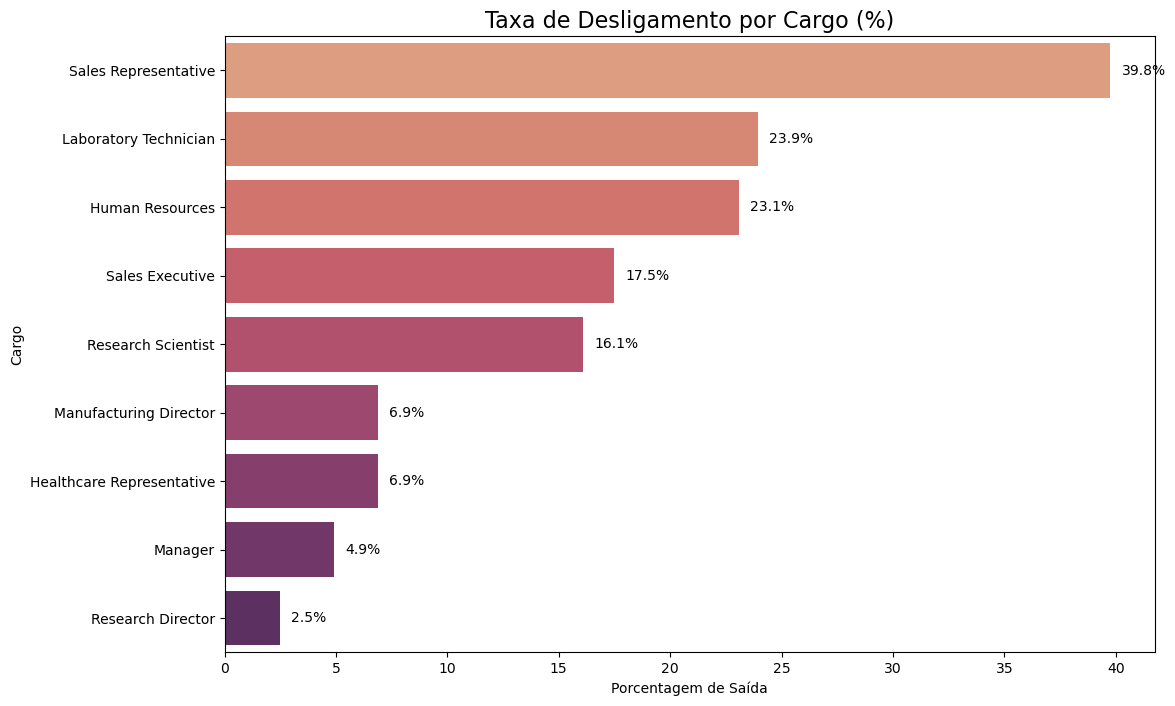

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=cargo_attrition.values, y=cargo_attrition.index, palette='flare', hue=cargo_attrition.index, legend=False)

plt.title('Taxa de Desligamento por Cargo (%)', fontsize=16)
plt.xlabel('Porcentagem de Saída')
plt.ylabel('Cargo')

for i, v in enumerate(cargo_attrition.values):
    plt.text(v + 0.5, i,f'{v:.1f}%', va='center', fontsize=10)

plt.show()

In [ ]:
# Média de satisfação por cargo para quem saiu
satisfacao_cargo = df_clean[df_clean['Attrition'] == 'Yes'].groupby('JobRole')['JobSatisfaction'].mean().sort_values()
print("Média de Satisfação de quem saiu (por cargo):")
print(satisfacao_cargo.round(2))

Média de Satisfação de quem saiu (por cargo):
JobRole
Human Resources              2.17
Manager                      2.40
Research Scientist           2.43
Laboratory Technician        2.44
Sales Representative         2.48
Research Director            2.50
Sales Executive              2.53
Manufacturing Director       2.60
Healthcare Representative    2.78
Name: JobSatisfaction, dtype: float64


In [ ]:
# Agrupando número de desligamentos por viagens
travel_attrition_count = df_clean[df_clean['Attrition'] == 'Yes'].groupby('BusinessTravel')['Attrition'].count()
pd.DataFrame(travel_attrition_count)

,Attrition
BusinessTravel,
Non-Travel,12
Travel_Frequently,69
Travel_Rarely,156


In [ ]:
# Tabela de porcentagem de saída por Frequência de viagens
viagem_attrition = pd.crosstab(df_clean['BusinessTravel'], df_clean['Attrition'], normalize='index') * 100
viagem_attrition = viagem_attrition['Yes'].sort_values(ascending=False)

pd.DataFrame(viagem_attrition.round(2))

,Yes
BusinessTravel,
Travel_Frequently,24.91
Travel_Rarely,14.96
Non-Travel,8.00


In [ ]:
tabela_viagem = pd.crosstab(df_clean['BusinessTravel'], df_clean['Attrition'])
chi2, p, dof, ex = chi2_contingency(tabela_viagem)

print(f"P-valor: {p:.4f}")
if p < 0.05:
    print("Conclusão: A frequência de viagem tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que a frequência de viagem influencie o desligamento.")

P-valor: 0.0000
Conclusão: A frequência de viagem tem influência significativa no desligamento.


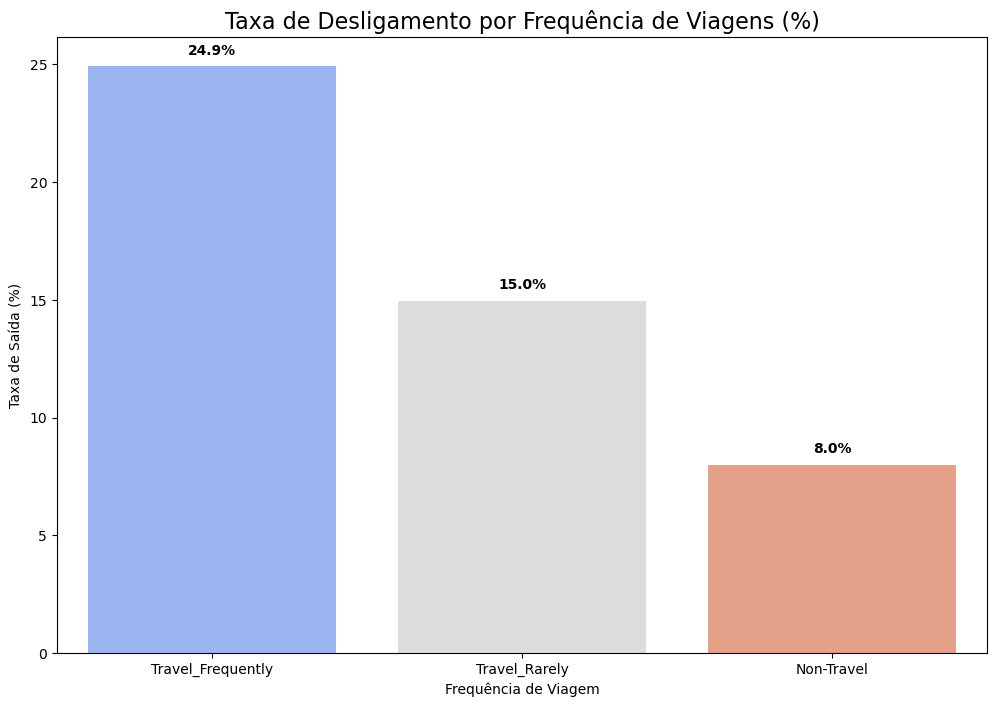

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=viagem_attrition.index, y=viagem_attrition.values, palette='coolwarm', hue=viagem_attrition.index)

plt.title('Taxa de Desligamento por Frequência de Viagens (%)', fontsize=16)
plt.xlabel('Frequência de Viagem')
plt.ylabel('Taxa de Saída (%)')

# Adicionando os rótulos de dados
for i, v in enumerate(viagem_attrition.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()





In [ ]:
# Tabela de porcentagem de Attrition por OverTime
extra_attrition = pd.crosstab(df_clean['OverTime'], df_clean['Attrition'], normalize='index') * 100
extra_attrition = extra_attrition['Yes'].sort_values(ascending=False)

print("Taxa de Rotatividade: Faz Hora Extra vs. Não Faz")
print(extra_attrition.round(2))

Taxa de Rotatividade: Faz Hora Extra vs. Não Faz
OverTime
Yes    30.53
No     10.44
Name: Yes, dtype: float64


In [ ]:
tabela_extra = pd.crosstab(df_clean['OverTime'], df_clean['Attrition'])
chi2, p, dof, ex = chi2_contingency(tabela_extra)

print(f"P-valor: {p:.4f}")
if p < 0.05:
    print("Conclusão: Hora extra tem influência significativa no desligamento.")
else:
    print("Conclusão: Não há evidência estatística de que hora extra influencie o desligamento.")

P-valor: 0.0000
Conclusão: Hora extra tem influência significativa no desligamento.


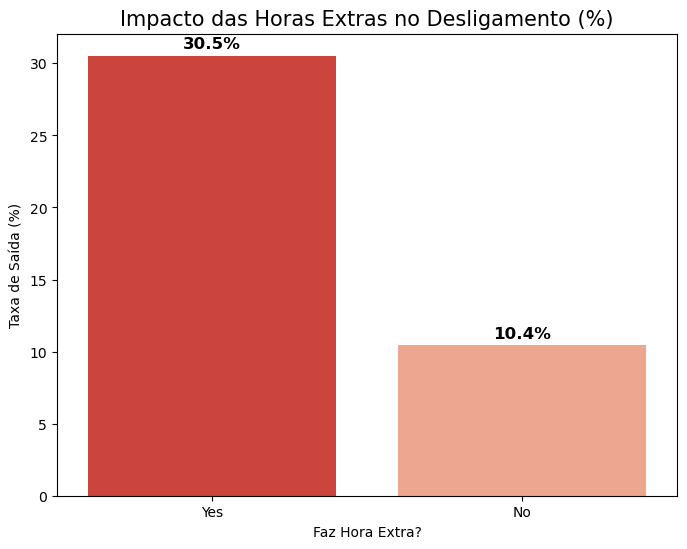

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=extra_attrition.index, y=extra_attrition.values, palette='Reds_r', hue=extra_attrition.index, legend=False)

plt.title('Impacto das Horas Extras no Desligamento (%)', fontsize=15)
plt.ylabel('Taxa de Saída (%)')
plt.xlabel('Faz Hora Extra?')

# Adicionando os rótulos de dados
for i, v in enumerate(extra_attrition.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.show()

## Análise do Perfil Profissional e Condições de Trabalho

A análise por departamento indica que as áreas de Vendas e Recursos Humanos
apresentam as maiores taxas de desligamento, com evidência estatística de
associação entre departamento e desligamento.

Ao detalhar por cargo, observa-se que funções ligadas à área comercial,
especialmente Sales Representative, apresentam níveis significativamente
mais altos de rotatividade. Esses cargos também apresentam níveis médios
de satisfação mais baixos entre os funcionários que se desligaram.

Adicionalmente, a frequência de viagens mostrou-se fortemente associada
ao desligamento, com funcionários que viajam frequentemente apresentando
taxas de attrition substancialmente superiores. O mesmo padrão é observado
em relação à realização de horas extras, que se destaca como um dos fatores
mais fortemente associados ao desligamento.

--------

## _REMUNERAÇÃO E BENEFÍCIOS_

In [ ]:
salario = df_clean.groupby('Attrition')['MonthlyIncome'].describe()
salario.round(2)

C:\Users\luizt\AppData\Local\Temp\ipykernel_5348\3052771702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salario = df_clean.groupby('Attrition')['MonthlyIncome'].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,6832.74,4818.21,1051.0,3211.0,5204.0,8834.0,19999.0
Yes,237.0,4787.09,3640.21,1009.0,2373.0,3202.0,5916.0,19859.0


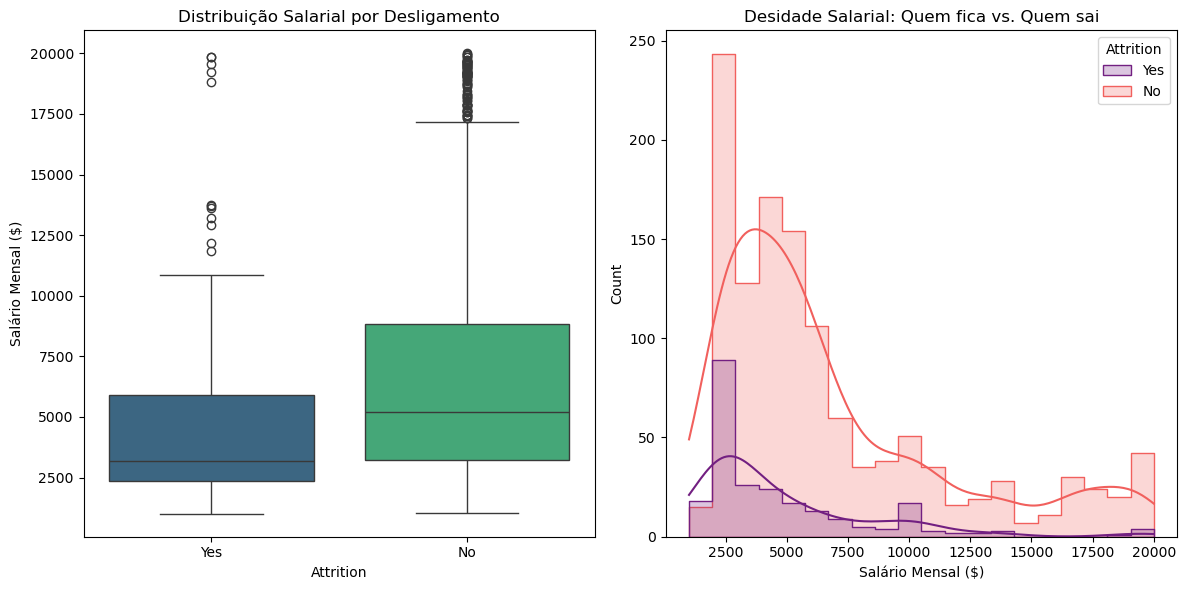

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(data=df_clean, x='Attrition', y='MonthlyIncome', palette='viridis', hue='Attrition', legend=False)
plt.title('Distribuição Salarial por Desligamento')
plt.ylabel('Salário Mensal ($)')

plt.subplot(1,2,2)
sns.histplot(data=df_clean, x='MonthlyIncome', hue='Attrition', kde=True, palette='magma', element='step')
plt.title('Desidade Salarial: Quem fica vs. Quem sai')
plt.xlabel('Salário Mensal ($)')

plt.tight_layout()
plt.show()

In [ ]:
salario_saiu = df_clean[df_clean['Attrition'] == 'Yes']['MonthlyIncome']
salario_ficou = df_clean[df_clean['Attrition'] == 'No']['MonthlyIncome']

t_stat, p_valor = stats.ttest_ind(salario_saiu, salario_ficou, equal_var=False)

print(f"Salário Médio (Quem Fica): ${salario_ficou.mean():,.2f}")
print(f"Salário Médio (Quem Sai): ${salario_saiu.mean():,.2f}")
print(f"P-valor: {p_valor:.4f}")

Salário Médio (Quem Fica): $6,832.74
Salário Médio (Quem Sai): $4,787.09
P-valor: 0.0000


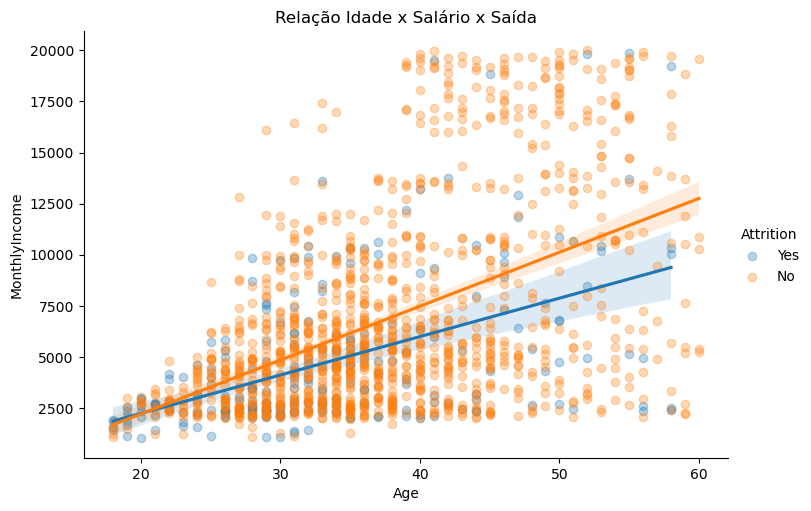

In [ ]:
# Média de salário por idade e Attrition
sns.lmplot(data=df_clean, x='Age', y='MonthlyIncome', hue='Attrition', aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Relação Idade x Salário x Saída')
plt.show()

## Remuneração e Desligamento

A análise da remuneração mensal indica que funcionários que se desligaram
apresentam, em média, salários significativamente menores quando comparados
àqueles que permaneceram na empresa. O salário médio dos funcionários que
ficaram é de aproximadamente $6.833, enquanto o salário médio dos que saíram
é de cerca de $4.787.

O teste estatístico t de Welch confirmou que essa diferença é estatisticamente
significativa (p-valor < 0.001), indicando associação entre nível de remuneração
e desligamento. Apesar da elevada variabilidade salarial observada em ambos
os grupos, a diferença média se mantém relevante do ponto de vista estatístico.

------

## _SATISFAÇÃO E ENGAJAMENTO_

In [ ]:
percepcao_resumo = df_clean.groupby('Attrition')[['JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']].mean()

print('Comparativo de Média (Escalas 1 a 4)')
display(percepcao_resumo.round(2))

Comparativo de Média (Escalas 1 a 4)


,JobSatisfaction,WorkLifeBalance,JobInvolvement
Attrition,,,
No,2.78,2.78,2.77
Yes,2.47,2.66,2.52


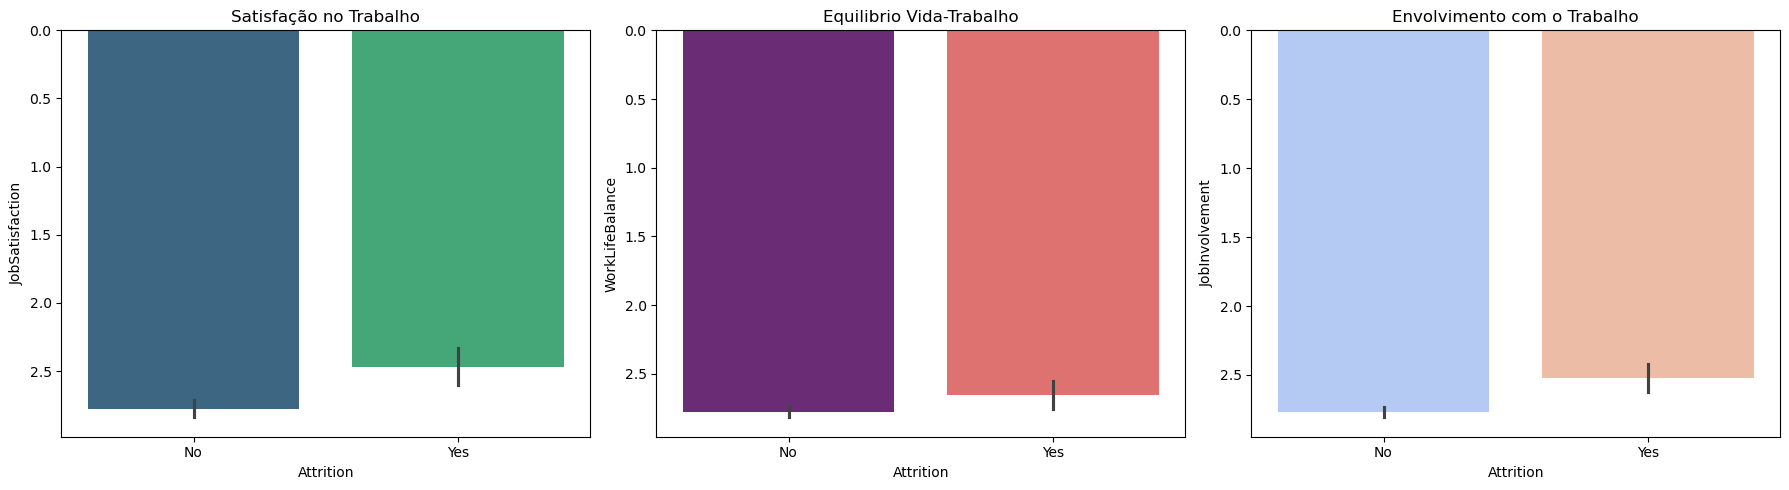

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Satisfação no trabalho
sns.barplot(data=df_clean, x='Attrition', y='JobSatisfaction', hue='Attrition', ax=axes[0], palette='viridis')
axes[0].set_title('Satisfação no Trabalho')

# Equilibrio Vida-Trabalho
sns.barplot(data=df_clean, x='Attrition', y='WorkLifeBalance', hue='Attrition', ax=axes[1], palette='magma')
axes[1].set_title('Equilibrio Vida-Trabalho')

# Envolvimento com o Trabalho
sns.barplot(data=df_clean, x='Attrition', y='JobInvolvement', hue='Attrition', ax=axes[2], palette='coolwarm')
axes[2].set_title('Envolvimento com o Trabalho')

plt.tight_layout()
plt.show()

In [ ]:
for col in ['JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']:
    tabela = pd.crosstab(df_clean[col], df_clean['Attrition'])
    chi2, p, dof, ex = chi2_contingency(tabela)
    print(f'P-valor para {col}: {p:.4f}')
print('-' * 50)
print('P < 0.05 sigfica que há impacto no desligamento')
    

P-valor para JobSatisfaction: 0.0006
P-valor para WorkLifeBalance: 0.0010
P-valor para JobInvolvement: 0.0000
--------------------------------------------------
P < 0.05 sigfica que há impacto no desligamento


## Satisfação, Engajamento e Desligamento

A análise das variáveis de satisfação e engajamento indica que funcionários
que se desligaram apresentam, em média, níveis mais baixos de satisfação no
trabalho, equilíbrio entre vida pessoal e profissional, e envolvimento com
as atividades, quando comparados àqueles que permaneceram na empresa.

Embora as diferenças nas médias das escalas sejam relativamente moderadas,
os testes estatísticos do Qui-quadrado demonstram que as distribuições dessas
variáveis diferem de forma estatisticamente significativa entre os grupos
(p-valor < 0.05). Isso indica que níveis mais baixos de satisfação, engajamento
e work-life balance estão associados a maiores taxas de desligamento.

Esses resultados sugerem que fatores subjetivos e comportamentais exercem
papel relevante na decisão de desligamento, mesmo quando diferenças médias
não são visualmente extremas.

-----------

### _HISTÓRICO DE CARREIRA_

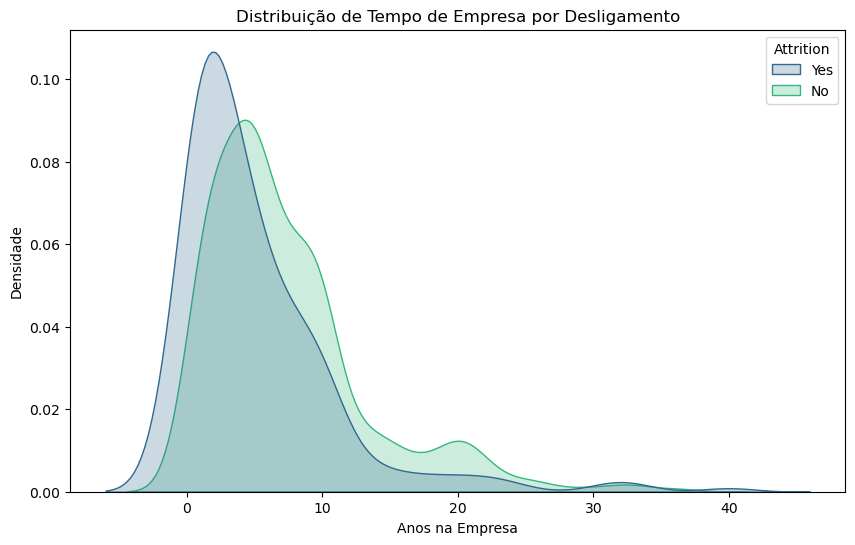

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x='YearsAtCompany', hue='Attrition', fill=True, common_norm=False, palette='viridis')
plt.title('Distribuição de Tempo de Empresa por Desligamento')
plt.xlabel('Anos na Empresa')
plt.ylabel('Densidade')
plt.show()

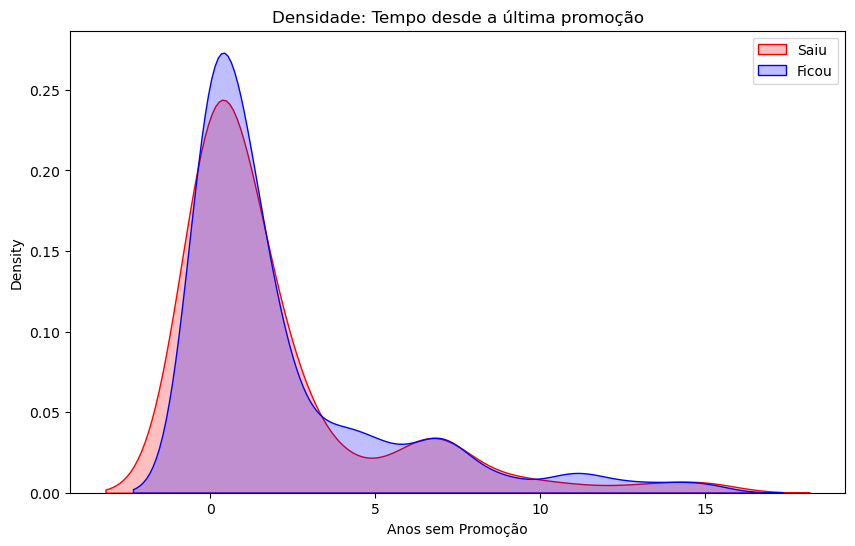

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean[df_clean['Attrition']=='Yes']['YearsSinceLastPromotion'], label='Saiu', fill=True, color='red')
sns.kdeplot(data=df_clean[df_clean['Attrition']=='No']['YearsSinceLastPromotion'], label='Ficou', fill=True, color='blue')
plt.title('Densidade: Tempo desde a última promoção')
plt.xlabel('Anos sem Promoção')
plt.legend()
plt.show()

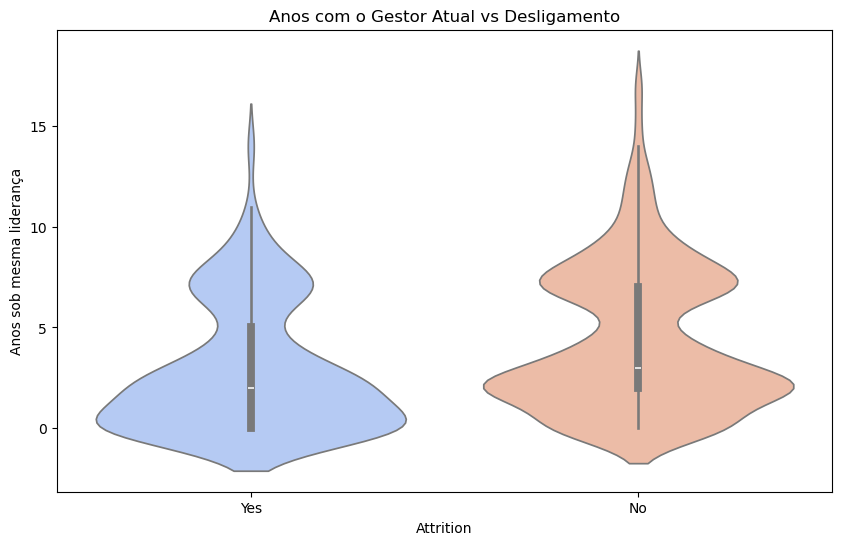

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='Attrition', y='YearsWithCurrManager', palette='coolwarm', hue='Attrition', legend=False)
plt.title('Anos com o Gestor Atual vs Desligamento')
plt.ylabel('Anos sob mesma liderança')
plt.show()

In [ ]:
vars_tempo = ['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for var in vars_tempo:
    saiu = df_clean[df_clean['Attrition'] == 'Yes'][var]
    ficou = df_clean[df_clean['Attrition'] == 'No'][var]
    t_stat, p_valor = stats.ttest_ind(saiu, ficou)
    print(f"Variável: {var:25} | P-valor: {p_valor:.4f}")

Variável: YearsAtCompany            | P-valor: 0.0000
Variável: YearsSinceLastPromotion   | P-valor: 0.2058
Variável: YearsWithCurrManager      | P-valor: 0.0000


## Histórico de Carreira e Desligamento

A análise do histórico de carreira indica que o tempo de empresa
(`YearsAtCompany`) apresenta diferença estatisticamente significativa entre
funcionários que se desligaram e aqueles que permaneceram, sugerindo maior
rotatividade nos primeiros anos de vínculo com a organização.

De forma semelhante, o tempo de convivência com o gestor atual
(`YearsWithCurrManager`) também se mostrou significativamente associado ao
desligamento, indicando que relações de liderança mais recentes podem estar
relacionadas a maiores taxas de saída.

Por outro lado, o tempo desde a última promoção (`YearsSinceLastPromotion`)
não apresentou diferença estatisticamente significativa entre os grupos,
sugerindo que, de forma isolada, essa variável não explica o desligamento dos
funcionários.

---------

## Conclusão

Este projeto analisou dados de Recursos Humanos com o objetivo de compreender
os principais fatores associados ao desligamento de funcionários (attrition).
A análise exploratória e estatística permitiu identificar padrões claros
relacionados a perfil demográfico, condições de trabalho, remuneração,
satisfação e histórico de carreira.

Os resultados indicam que o desligamento é mais frequente entre funcionários
mais jovens, especialmente na faixa etária de 18 a 24 anos, e entre profissionais
solteiros. Em termos de perfil profissional, os departamentos de Vendas e
Recursos Humanos apresentam as maiores taxas de rotatividade, com destaque
para cargos específicos como Sales Representative e Laboratory Technician.

Fatores relacionados às condições de trabalho mostraram forte associação com
o desligamento. Funcionários que realizam horas extras ou viajam com maior
frequência apresentam taxas de attrition significativamente superiores.
Além disso, níveis mais baixos de satisfação no trabalho, engajamento e
equilíbrio entre vida pessoal e profissional estão associados a maiores
probabilidades de saída, mesmo quando as diferenças médias aparentam ser
moderadas.

A análise de remuneração revelou que funcionários que se desligaram possuem,
em média, salários significativamente menores do que aqueles que permaneceram
na empresa. Já no histórico de carreira, observou-se que menor tempo de empresa
e menor tempo de convivência com o gestor atual estão associados a maiores
taxas de desligamento, enquanto o tempo desde a última promoção, de forma
isolada, não se mostrou estatisticamente significativo.

De forma geral, os resultados sugerem que o desligamento é um fenômeno
multifatorial, influenciado por uma combinação de fatores demográficos,
profissionais, financeiros e comportamentais. Esses achados reforçam a
importância de estratégias integradas de retenção, com foco especial em
funcionários em início de carreira, cargos comerciais, condições de trabalho,
liderança e políticas de remuneração e engajamento.